# Exploration: optimization of a surface for flux!

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath('../../'))
from motors.simulation import *
from motors.plot import *
prepare_plot()

import matplotlib as mpl
import scipy as sc
%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)
cmap = sns.color_palette("Paired", 10)

In [6]:
from scipy import interpolate

def objective(spline_points):
    #print('Guess for energy surface:\t{}'.format(spline_points))
    x_points = [0, 10, 20, 30, 40, 50, 59]

    xnew = np.arange(60)
    energy = interpolate.spline(x_points, spline_points, xnew=xnew)
    energies.append(energy)
    
    
    this = Simulation(data_source = 'manual')
    this.unbound = energy
    this.bound = interpolate.spline(x_points, [3, 4, 5, 0, 1, 2, 3], xnew=xnew)

    this.C_intersurface = 10 ** 6     # per mole per second
    this.offset_factor = 5.7          # kcal per mol
    this.catalytic_rate = 312         # per second
    this.cSubstrate = 2.5 * 10 ** -3

    this.simulate(user_energies=True)
    fluxes.append(np.mean(this.flux_u + this.flux_b))
    #print('Directional flux:\t\t{}'.format(-1 * abs(np.mean(this.flux_u + this.flux_b))))
    return np.mean(this.flux_u + this.flux_b)

In [7]:
guess = [0, 0, 0, 0, 0, 0, 0]
energies = []
fluxes = []
np.random.seed(42)
results = sc.optimize.minimize(objective, guess, method='Nelder-Mead',
                     bounds=((0, 10), (0, 10), (0, 10),
                             (0, 10), (0, 10), (0, 10),
                             (0, 10)))

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/scipy/optimize/_minimize.py:394: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  RuntimeWarning)


In [8]:
results['nfev']

1366

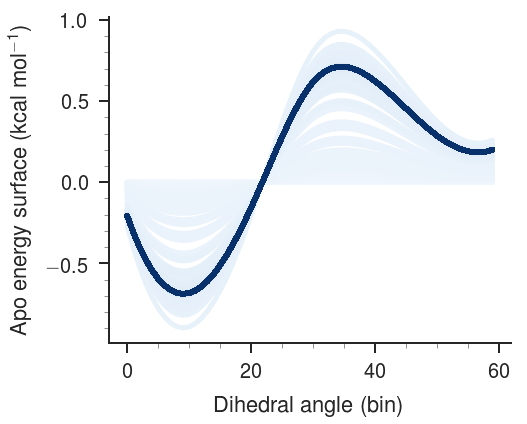

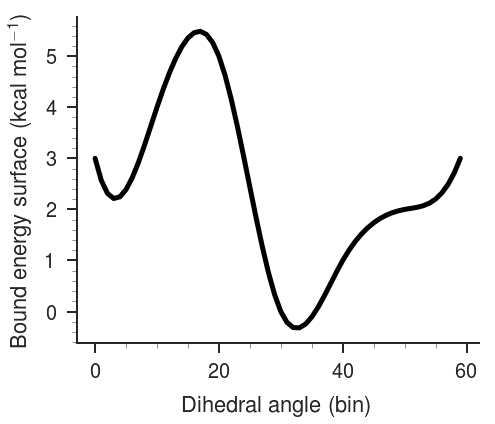

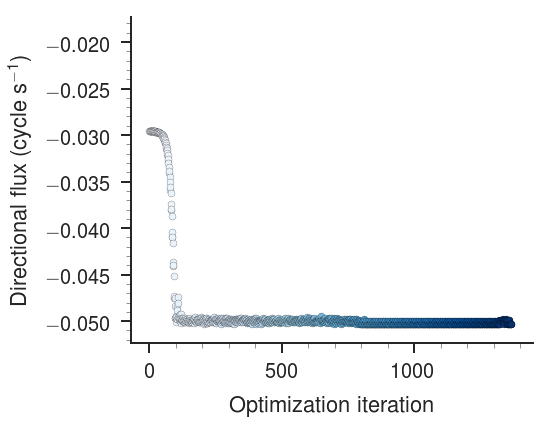

In [10]:
fig = plt.figure(figsize=(6 * 1.2, 6))
grid = GridSpec(1, 1, wspace=0.4, hspace=0.2)
ax1 = plt.subplot(grid[0, 0])
c = sns.color_palette("Blues", n_colors=len(energies))
for index,energy in enumerate(energies):
    ax1.plot(range(60), energy, color=c[index])
ax1.set_xlabel('Dihedral angle (bin)')
ax1.set_ylabel('Apo energy surface (kcal mol$^{-1}$)')
paper_plot(fig)

fig = plt.figure(figsize=(6 * 1.2, 6))
grid = GridSpec(1, 1, wspace=0.4, hspace=0.2)
ax1 = plt.subplot(grid[0, 0])
ax1.plot(range(60), 
         interpolate.spline([0, 10, 20, 30, 40, 50, 59], [3, 4, 5, 0, 1, 2, 3], xnew=np.arange(60)),
         color='k')
ax1.set_xlabel('Dihedral angle (bin)')
ax1.set_ylabel('Bound energy surface (kcal mol$^{-1}$)')
paper_plot(fig)

fig = plt.figure(figsize=(6 * 1.2, 6))
grid = GridSpec(1, 1, wspace=0.4, hspace=0.2)
ax2 = plt.subplot(grid[0, 0])
c = sns.color_palette("Blues", n_colors=len(energies))
for index,flux in enumerate(fluxes):
    ax2.scatter(index, flux, color=c[index], lw=0.2, edgecolor='k')
ax2.set_xlabel('Optimization iteration')
ax2.set_ylabel('Directional flux (cycle s$^{-1}$)')
paper_plot(fig)

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/scipy/optimize/_minimize.py:394: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  RuntimeWarning)


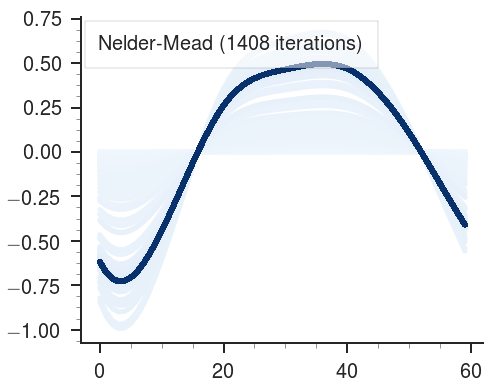

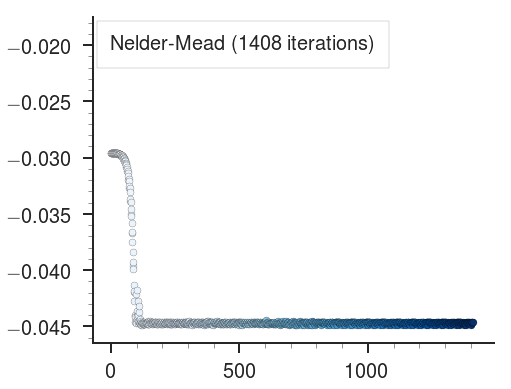

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/scipy/optimize/_minimize.py:394: RuntimeWarning: Method Powell cannot handle constraints nor bounds.
  RuntimeWarning)


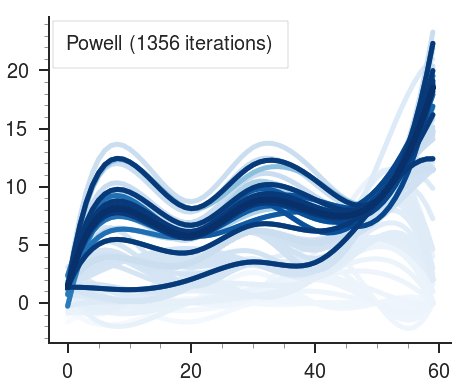

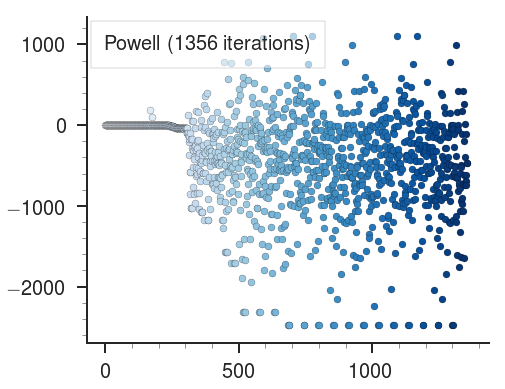

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/scipy/optimize/_minimize.py:394: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)


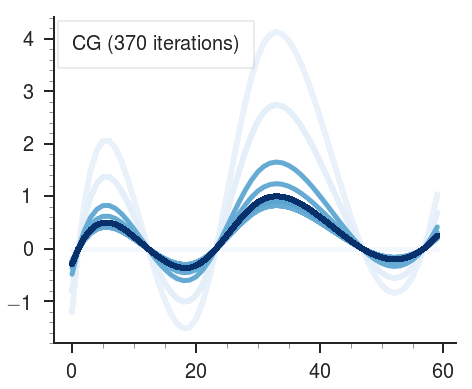

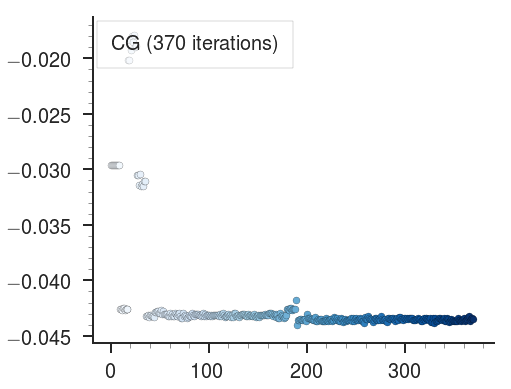

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/scipy/optimize/_minimize.py:394: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)


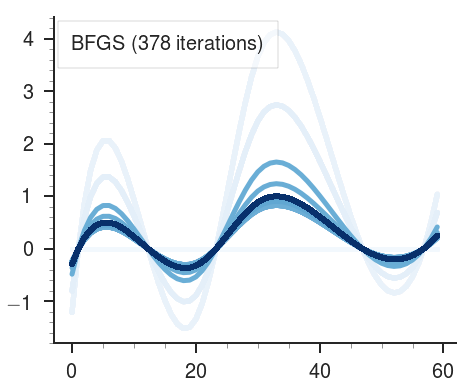

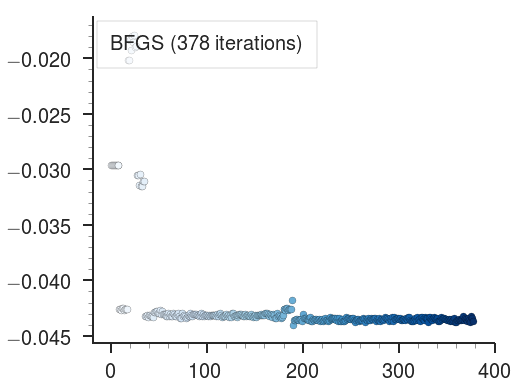

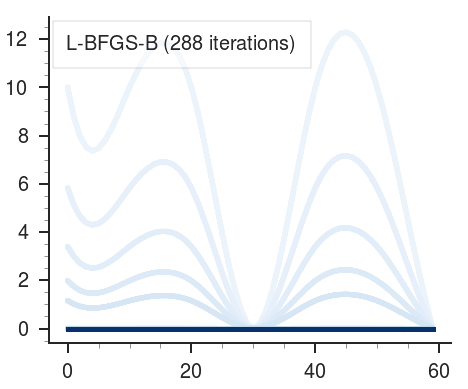

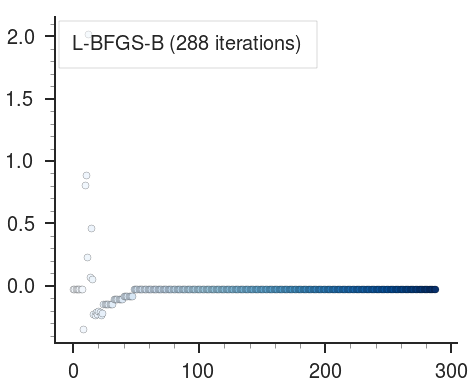

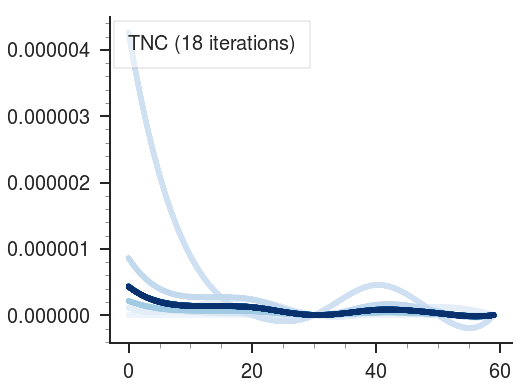

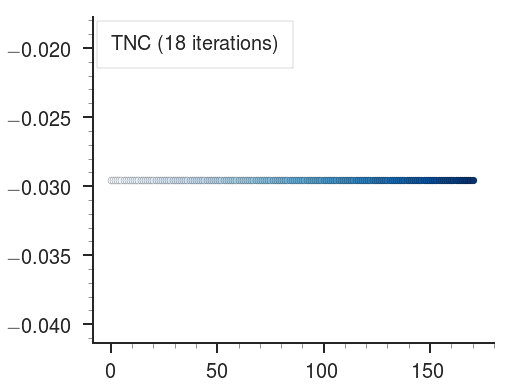

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/scipy/optimize/_minimize.py:400: RuntimeWarning: Method COBYLA cannot handle bounds.
  RuntimeWarning)


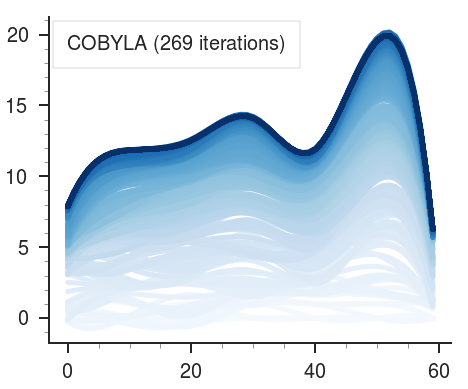

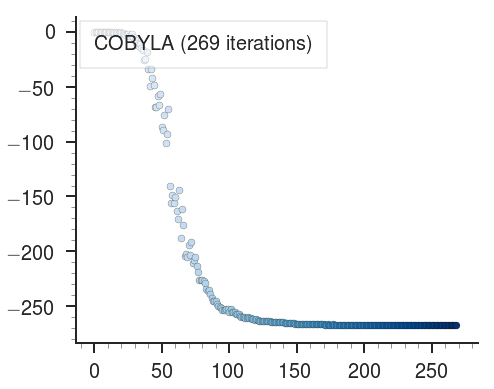

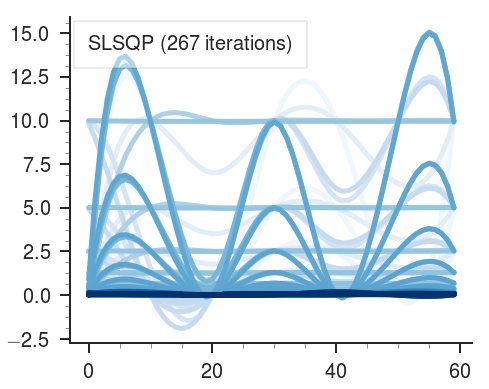

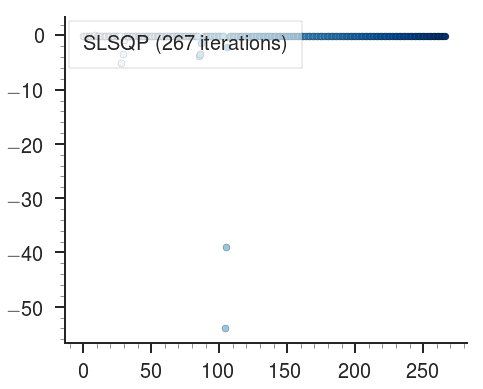

In [118]:
def plot_results(energies, fluxes, method, iterations):
    fig = plt.figure(figsize=(6 * 1.2, 6))
    grid = GridSpec(1, 1, wspace=0.4, hspace=0.2)
    ax1 = plt.subplot(grid[0, 0])
    c = sns.color_palette("Blues", n_colors=len(energies))
    for index,energy in enumerate(energies):
        ax1.plot(range(60), energy, color=c[index])
    #ax1.plot(range(60), energies[0], color='k', alpha=0, label='{} ({} iterations)'.format(method, iterations))
    from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
    at = AnchoredText('{} ({} iterations)'.format(method, iterations),
                      prop=dict(size=20), frameon=True, loc=2
    )
    at.patch.set(boxstyle='square', alpha=0.5)
    ax1.add_artist(at)
    # ax1.set_xlabel('Dihedral angle (bin)')
    # ax1.set_ylabel('Apo energy surface (kcal mol$^{-1}$)')
    paper_plot(fig)
    plt.show()

    fig = plt.figure(figsize=(6 * 1.2, 6))
    grid = GridSpec(1, 1, wspace=0.4, hspace=0.2)
    ax2 = plt.subplot(grid[0, 0])
    c = sns.color_palette("Blues", n_colors=len(energies))
    for index,flux in enumerate(fluxes):
        ax2.scatter(index, flux, color=c[index], lw=0.2, edgecolor='k')
    at = AnchoredText('{} ({} iterations)'.format(method, iterations),
                      prop=dict(size=20), frameon=True, loc=2
    )
    at.patch.set(boxstyle='square', alpha=0.5)
    ax2.add_artist(at)
    # ax2.set_xlabel('Optimization iteration')
    # ax2.set_ylabel('Directional flux (cycle s$^{-1}$)')
    paper_plot(fig)
    plt.show()
    
methods = ['Nelder-Mead',
          'Powell',
          'CG',
          'BFGS',
          'L-BFGS-B',
          'TNC',
          'COBYLA',
          'SLSQP']
for method in methods:
    guess = [0, 0, 0, 0, 0, 0, 0]
    energies = []
    fluxes = []
    # np.random.seed(42)
    results = sc.optimize.minimize(objective, guess, method=method,
                         bounds=((0, 10), (0, 10), (0, 10),
                                 (0, 10), (0, 10), (0, 10),
                                 (0, 10)))
    plot_results(energies, fluxes, method, results['nfev'])

## Optimize both surfaces together

In [126]:
def objective(spline_points):
    spline_x = [0, 10, 20, 30, 40, 50, 59]
    full_x   = np.arange(60)
    
    apo   = interpolate.spline(spline_x, spline_points[0:len(spline_x)], xnew=full_x)
    bound = interpolate.spline(spline_x, spline_points[len(spline_x):2 * len(spline_x)], xnew=full_x)
    
     
    
    apos.append(apo)
    bounds.append(bound)
    
    this = Simulation(data_source = 'manual')
    this.unbound = apo
    this.bound = bound

    this.C_intersurface = 10 ** 6     # per mole per second
    this.offset_factor = 5.7          # kcal per mol
    this.catalytic_rate = 312         # per second
    this.cSubstrate = 2.5 * 10 ** -3

    this.simulate(user_energies=True)
    fluxes.append(np.mean(this.flux_u + this.flux_b))
    return np.mean(this.flux_u + this.flux_b)

In [9]:
def plot_results(apos, bounds, fluxes, method, iterations):
    fig = plt.figure(figsize=(6 * 1.2, 6))
    grid = GridSpec(1, 1, wspace=0.4, hspace=0.2)
    ax1 = plt.subplot(grid[0, 0])
    c = sns.color_palette("Blues", n_colors=len(apos))
    for index,energy in enumerate(apos):
        ax1.plot(range(60), energy, color=c[index])
    from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
    at = AnchoredText('{} ({} iterations)'.format(method, iterations),
                      prop=dict(size=20), frameon=True, loc=2
    )
    at.patch.set(boxstyle='square', alpha=0.5)
    ax1.add_artist(at)
    paper_plot(fig)
    plt.show()
    
    fig = plt.figure(figsize=(6 * 1.2, 6))
    grid = GridSpec(1, 1, wspace=0.4, hspace=0.2)
    ax1 = plt.subplot(grid[0, 0])
    c = sns.color_palette("Blues", n_colors=len(apos))
    for index,energy in enumerate(bounds):
        ax1.plot(range(60), energy, color=c[index])
    from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
    at = AnchoredText('{} ({} iterations)'.format(method, iterations),
                      prop=dict(size=20), frameon=True, loc=2
    )
    at.patch.set(boxstyle='square', alpha=0.5)
    ax1.add_artist(at)
    paper_plot(fig)
    plt.show()

    fig = plt.figure(figsize=(6 * 1.2, 6))
    grid = GridSpec(1, 1, wspace=0.4, hspace=0.2)
    ax2 = plt.subplot(grid[0, 0])
    c = sns.color_palette("Blues", n_colors=len(apos))
    for index,flux in enumerate(fluxes):
        ax2.scatter(index, flux, color=c[index], lw=0.2, edgecolor='k')
    at = AnchoredText('{0} ({1:4.2f} cycle s$^ {{-1}}$)'.format(method, fluxes[-1]),
                      prop=dict(size=20), frameon=True, loc=2
    )
    at.patch.set(boxstyle='square', alpha=0.5)
    ax2.add_artist(at)
    paper_plot(fig)
    plt.show()

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/scipy/optimize/_minimize.py:394: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  RuntimeWarning)


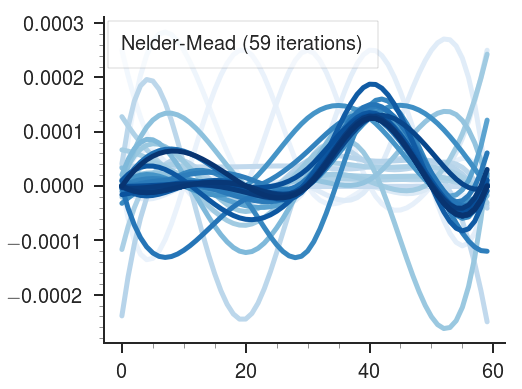

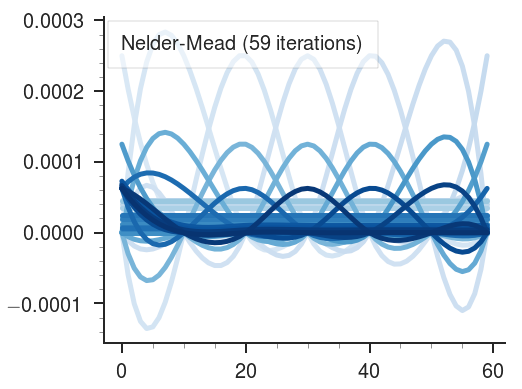

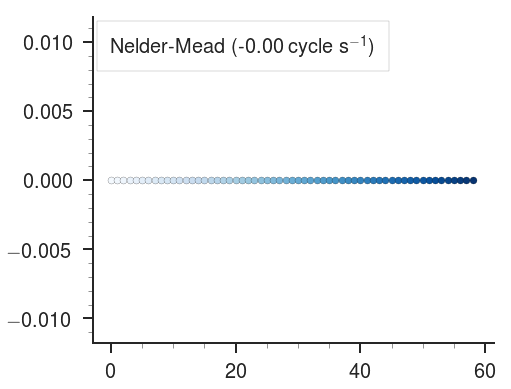

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/scipy/optimize/_minimize.py:394: RuntimeWarning: Method Powell cannot handle constraints nor bounds.
  RuntimeWarning)
/media/dslochower/data-beta/projects/nonequilibrium-manuscript/simulation.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  ss = abs(eigenvectors[:, self.eigenvalues.argmax()].astype(float))


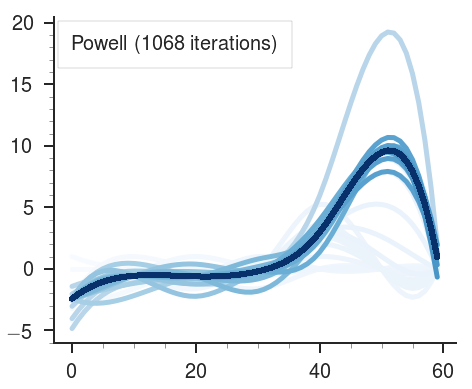

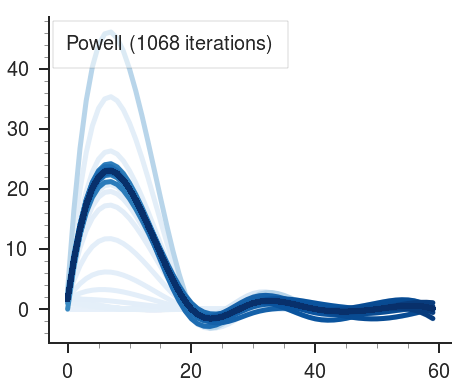

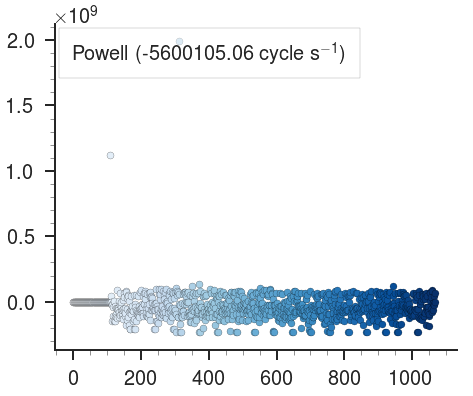

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/scipy/optimize/_minimize.py:394: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)


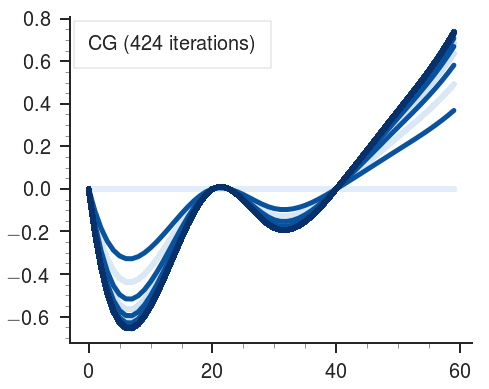

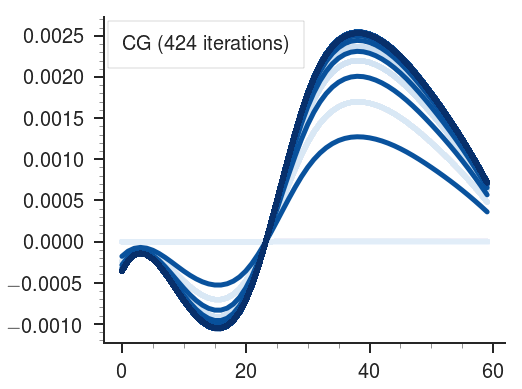

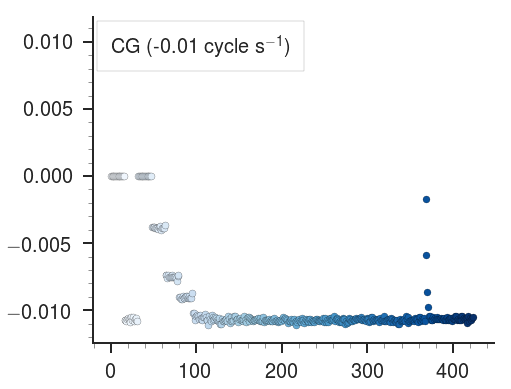

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/scipy/optimize/_minimize.py:394: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)


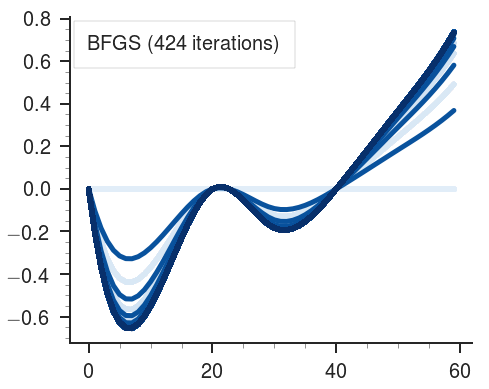

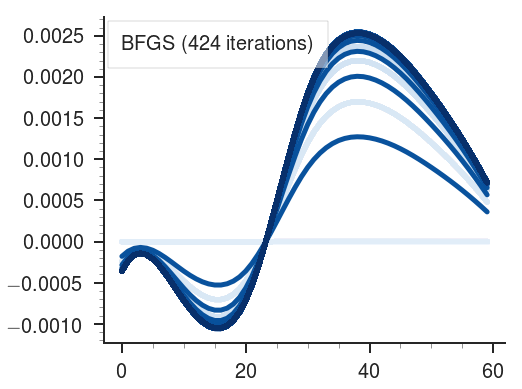

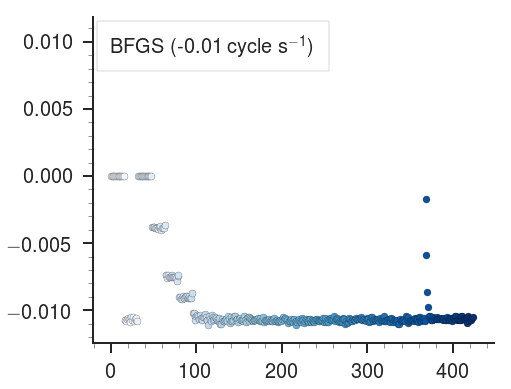

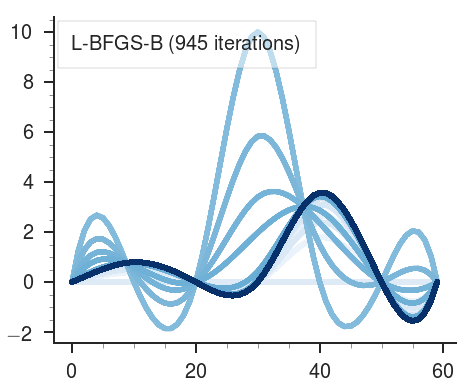

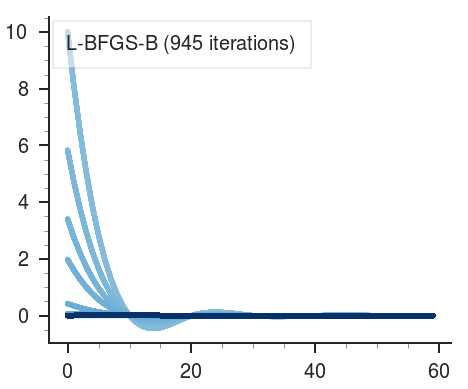

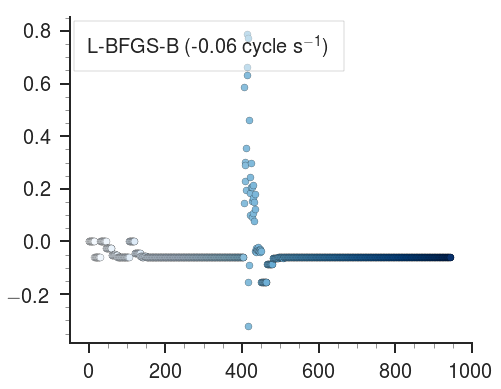

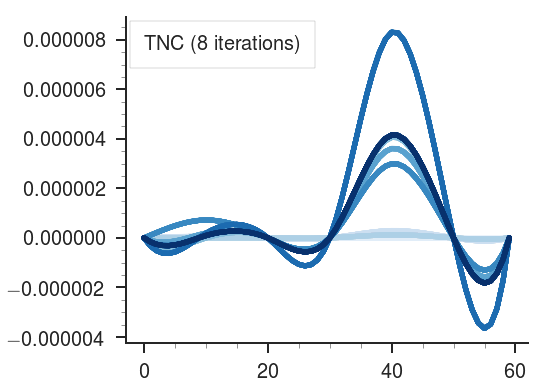

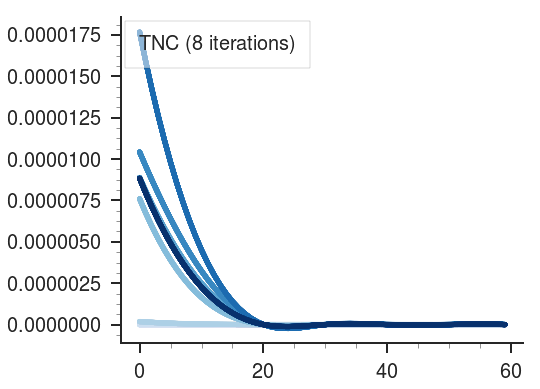

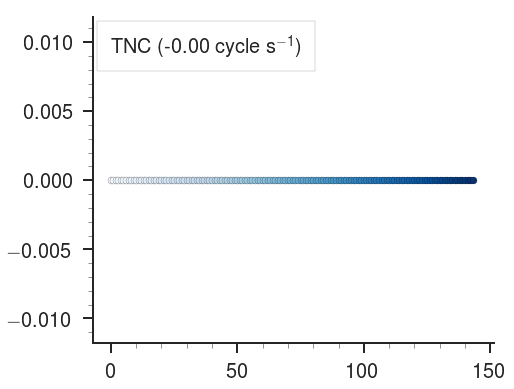

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/scipy/optimize/_minimize.py:400: RuntimeWarning: Method COBYLA cannot handle bounds.
  RuntimeWarning)


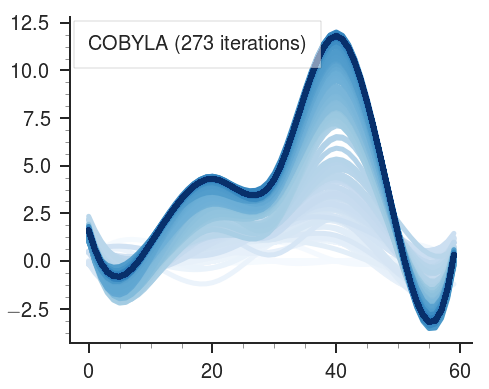

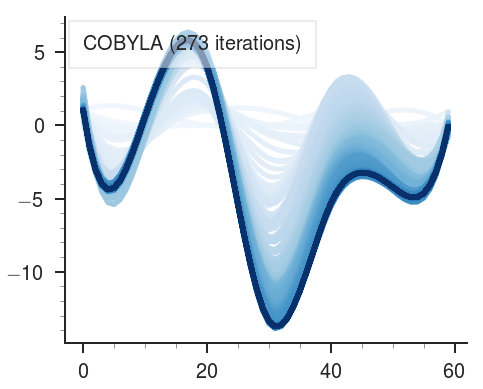

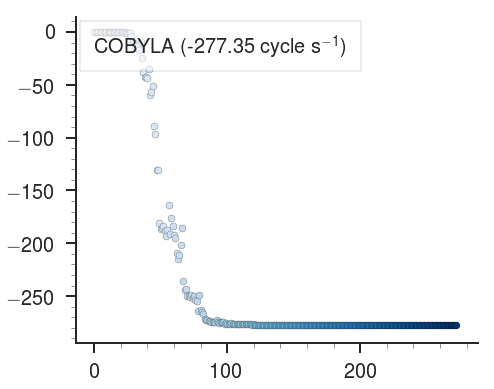

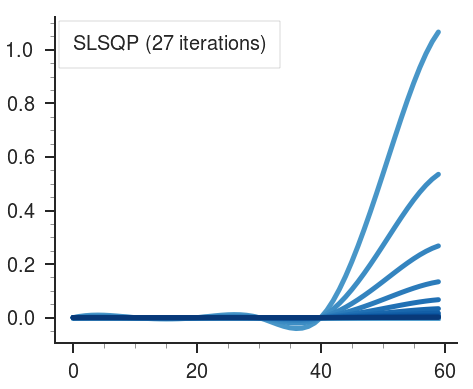

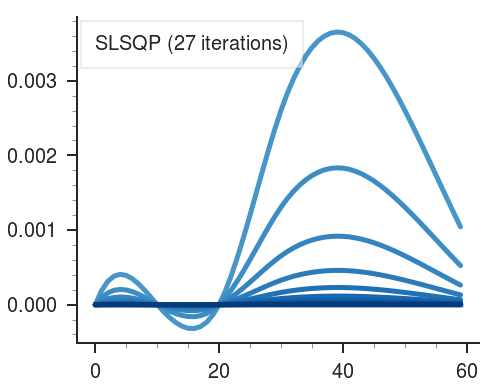

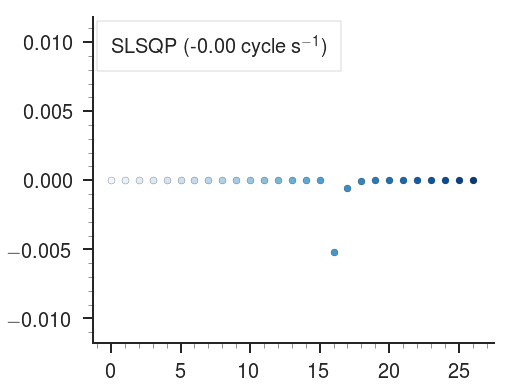

In [142]:
methods = ['Nelder-Mead',
          'Powell',
          'CG',
          'BFGS',
          'L-BFGS-B',
          'TNC',
          'COBYLA',
          'SLSQP']
for method in methods:
    guess = [0, 0, 0, 0, 0, 0, 0]*2
    apos = []
    bounds = []
    fluxes = []
    # np.random.seed(42)
    results = sc.optimize.minimize(objective, guess, method=method,
                         bounds=((0, 10), (0, 10), (0, 10),
                                 (0, 10), (0, 10), (0, 10),
                                 (0, 10), (0, 10), (0, 10),
                                 (0, 10), (0, 10), (0, 10),
                                 (0, 10), (0, 10)))
    plot_results(apos, bounds, fluxes, method, results['nfev'])

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/scipy/optimize/_minimize.py:394: RuntimeWarning: Method Powell cannot handle constraints nor bounds.
  RuntimeWarning)


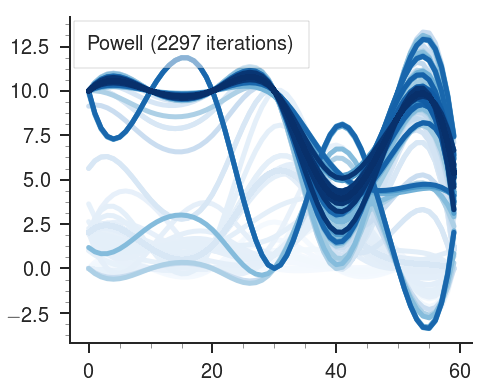

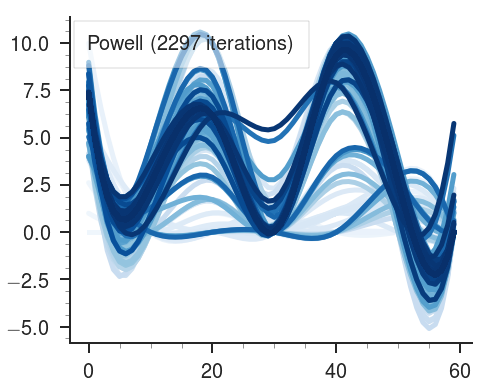

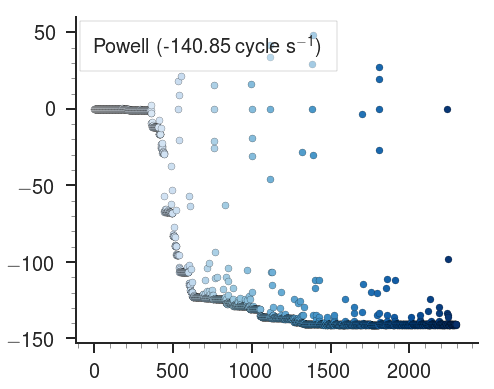

In [195]:
def objective_pinned(spline_points):
    spline_x = [0, 10, 20, 30, 40, 50, 59]
    full_x   = np.arange(60)
        
    for index, point in enumerate(spline_points):
        if point >= 10:
            spline_points[index] = 10
        if point <= 0:
            spline_points[index] = 0
    
    apo   = interpolate.spline(spline_x, spline_points[0:len(spline_x)], xnew=full_x)
    bound = interpolate.spline(spline_x, spline_points[len(spline_x):2 * len(spline_x)], xnew=full_x)
    
    apos.append(apo)
    bounds.append(bound)
    
    this = Simulation(data_source = 'manual')
    this.unbound = apo
    this.bound = bound

    this.C_intersurface = 10 ** 6     # per mole per second
    this.offset_factor = 5.7          # kcal per mol
    this.catalytic_rate = 312         # per second
    this.cSubstrate = 2.5 * 10 ** -3

    this.simulate(user_energies=True)
    fluxes.append(np.mean(this.flux_u + this.flux_b))
    return np.mean(this.flux_u + this.flux_b)

guess = [0, 0, 0, 0, 0, 0, 0]*2
apos = []
bounds = []
fluxes = []
np.random.seed(42)
results = sc.optimize.minimize(objective_pinned, guess, method='Powell',
                     bounds=((0, 0.1), (0, 10), (0, 10),
                             (0, 10), (0, 10), (0, 10),
                             (0, 10), (0, 10), (0, 10),
                             (0, 10), (0, 10), (0, 10),
                             (0, 10), (0, 10)))


plot_results(apos, bounds, fluxes, 'Powell', results['nfev'])

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/scipy/optimize/_minimize.py:400: RuntimeWarning: Method COBYLA cannot handle bounds.
  RuntimeWarning)


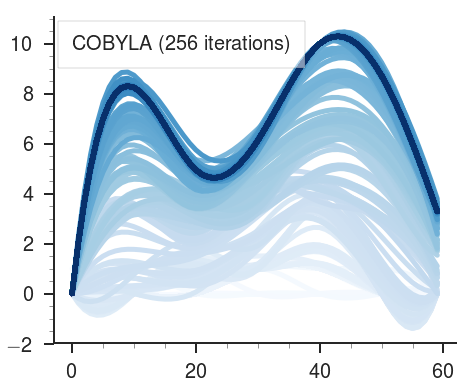

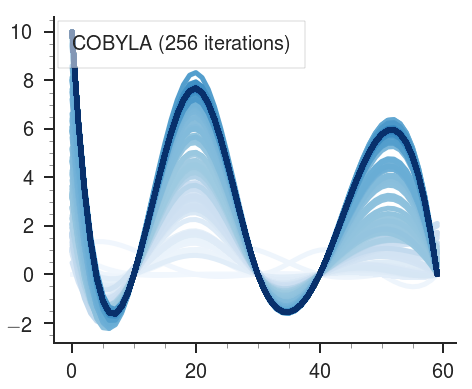

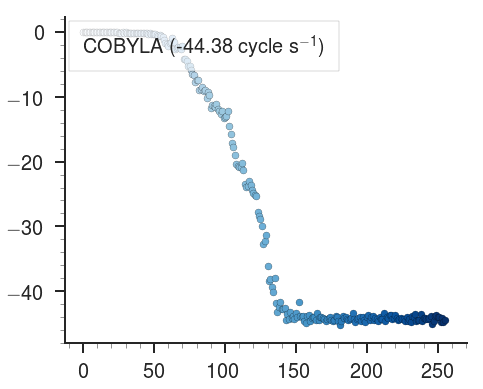

In [13]:
def objective_pinned(spline_points):
    spline_x = [0, 10, 20, 30, 40, 50, 59]
    full_x   = np.arange(60)
        
    for index, point in enumerate(spline_points):
        if point >= 10:
            spline_points[index] = 10
        if point <= 0:
            spline_points[index] = 0
    
    apo   = interpolate.spline(spline_x, spline_points[0:len(spline_x)], xnew=full_x)
    bound = interpolate.spline(spline_x, spline_points[len(spline_x):2 * len(spline_x)], xnew=full_x)
    
    apos.append(apo)
    bounds.append(bound)
    
    this = Simulation(data_source = 'manual')
    this.unbound = apo
    this.bound = bound

    this.C_intersurface = 10 ** 6     # per mole per second
    this.offset_factor = 5.7          # kcal per mol
    this.catalytic_rate = 312         # per second
    this.cSubstrate = 2.5 * 10 ** -3

    this.simulate(user_energies=True)
    fluxes.append(np.mean(this.flux_u + this.flux_b))
    return np.mean(this.flux_u + this.flux_b)

guess = [0, 0, 0, 0, 0, 0, 0]*2
apos = []
bounds = []
fluxes = []
# np.random.seed(42)
results = sc.optimize.minimize(objective_pinned, guess, method='COBYLA',
                     bounds=((0, 0.1), (0, 10), (0, 10),
                             (0, 10), (0, 10), (0, 10),
                             (0, 10), (0, 10), (0, 10),
                             (0, 10), (0, 10), (0, 10),
                             (0, 10), (0, 10)))


plot_results(apos, bounds, fluxes, 'COBYLA', results['nfev'])

In [187]:
results['x']

array([ 35.57885318,  31.99026952,  32.63605038,  19.78196237,
         3.95862005,   8.55314693,   5.37203062,   7.37700607,
         2.56155739,   6.18622577,  -0.65212298,   9.35808631,
         2.59733253,  -0.37745617])

In [188]:
spline_x = [0, 10, 20, 30, 40, 50, 59]
full_x   = np.arange(60)

for index, point in enumerate(results['x']):
    if point >= 10:
        results['x'][index] = 10
    if point <= 0:
        results['x'][index] = 0

print(results['x'])
apo   = interpolate.spline(spline_x, results['x'][0:7], xnew=full_x)
bound = interpolate.spline(spline_x, results['x'][7:], xnew=full_x)

apos.append(apo)
bounds.append(bound)

this = Simulation(data_source = 'manual')
this.unbound = apo
this.bound = bound

this.C_intersurface = 10 ** 6     # per mole per second
this.offset_factor = 5.7          # kcal per mol
this.catalytic_rate = 312         # per second
this.cSubstrate = 2.5 * 10 ** -3

this.simulate(user_energies=True)

[ 10.          10.          10.          10.           3.95862005
   8.55314693   5.37203062   7.37700607   2.56155739   6.18622577   0.
   9.35808631   2.59733253   0.        ]


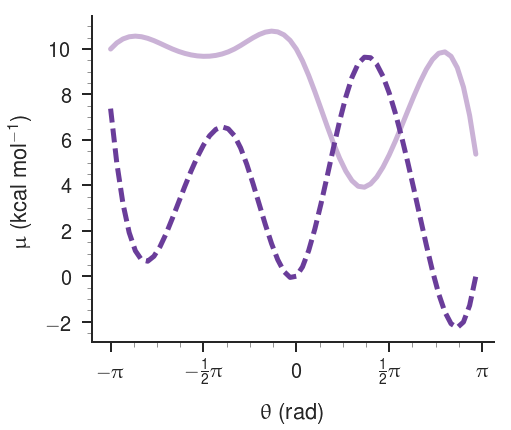

In [189]:
plot_energy(this)

C                         +1.00e+06  second**-1
D                         +3.00e+12  degrees**2 second**-1
k_{cat}                   +3.12e+02  second**-1
[S]                       +2.50e-03  M         
dt                        +1.00e-14  second    
-------------------------
Intrasurface flux         -1.41e+02  cycle second**-1
Peak                      +9.99e+01  cycle second**-1


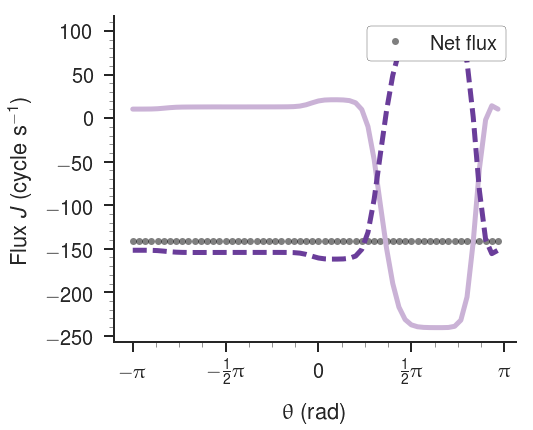

In [190]:
plot_flux(this)

# Try to brute force 10 points per spline over night.

In [ ]:
df = pd.DataFrame()

point_range = np.arange(0, 9, 1)
for point_one in point_range:
    for point_two in point_range:
        for point_three in point_range:
            for point_four in point_range:
                for point_five in point_range:
                    for point_six in point_range:
                        
                        x = [0, 10, 20, 40, 50, 59]
                        y = [point_one, point_two, point_three,
                             point_four, point_five, point_six]
                        x_extrapolated = np.arange(60)
                        energy = interpolate.spline(x, y, xnew=x_extrapolated)

                        this = Simulation(data_source = 'manual')
                        this.unbound = energy
                        this.bound = interpolate.spline(x, [3, 4, 5, 1, 2, 3], 
                                                        xnew=x_extrapolated)

                        this.C_intersurface = 10 ** 6     # per mole per second
                        this.offset_factor = 5.7          # kcal per mol
                        this.catalytic_rate = 312         # per second
                        this.cSubstrate = 2.5 * 10 ** -3
                        this.simulate(user_energies=True)
                        df = df.append(pd.DataFrame({
                            'point 1': point_one,
                            'point 2': point_two,
                            'point 3': point_three,
                            'point 4': point_four,
                            'point 5': point_five,
                            'point 6': point_six,
                            'flux': np.mean(this.flux_u + this.flux_b)
                        },index=[0]), ignore_index=True)

In [8]:
df

,flux,point 1,point 2,point 3,point 4,point 5,point 6
0,-0.001912,0,0,0,0,0,0
1,-0.002523,0,0,0,0,0,1
2,-0.004040,0,0,0,0,0,2
3,-0.004706,0,0,0,0,0,3
4,-0.012772,0,0,0,0,0,4
5,-0.000816,0,0,0,0,0,5
6,-0.060260,0,0,0,0,0,6
7,-0.071018,0,0,0,0,0,7
8,0.023470,0,0,0,0,0,8
9,-0.004019,0,0,0,0,1,0


In [9]:
df.to_pickle('optimize-flux.pickle')

In [ ]:
g = sns.FacetGrid(df, col='flux', row='point 1')
g = gmap.(plt.scatter, 'flux', 'point 1')

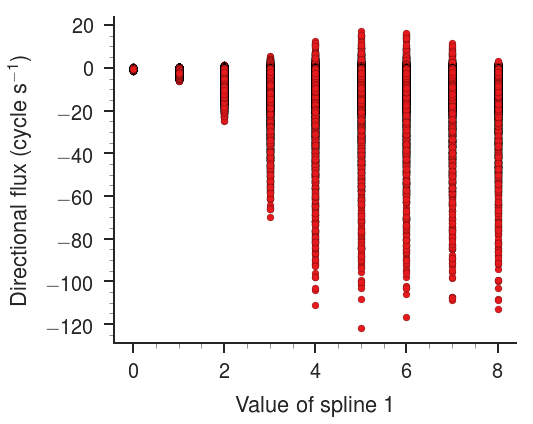

In [19]:
c = sns.color_palette("Set1", n_colors=6)

fig = plt.figure(figsize=(6 * 1.2, 6))
grid = GridSpec(1, 1, wspace=0.4, hspace=0.2)
ax2 = plt.subplot(grid[0, 0])
ax2.scatter(df['point 1'], df['flux'], color=c[0], lw=0.2, edgecolor='k')
ax2.set_xlabel('Value of spline 1')
ax2.set_ylabel('Directional flux (cycle s$^{-1}$)')
paper_plot(fig)

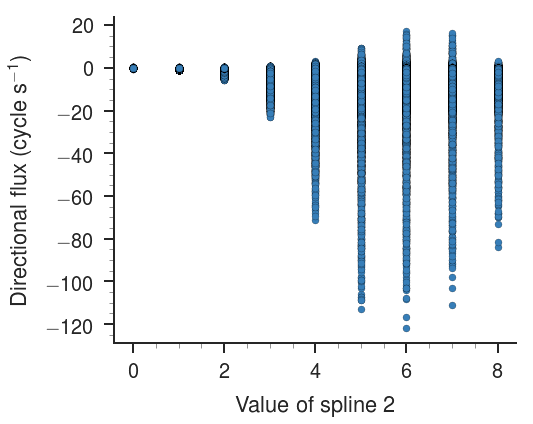

In [20]:
fig = plt.figure(figsize=(6 * 1.2, 6))
grid = GridSpec(1, 1, wspace=0.4, hspace=0.2)
ax2 = plt.subplot(grid[0, 0])
ax2.scatter(df['point 2'], df['flux'], color=c[1], lw=0.2, edgecolor='k')
ax2.set_xlabel('Value of spline 2')
ax2.set_ylabel('Directional flux (cycle s$^{-1}$)')
paper_plot(fig)

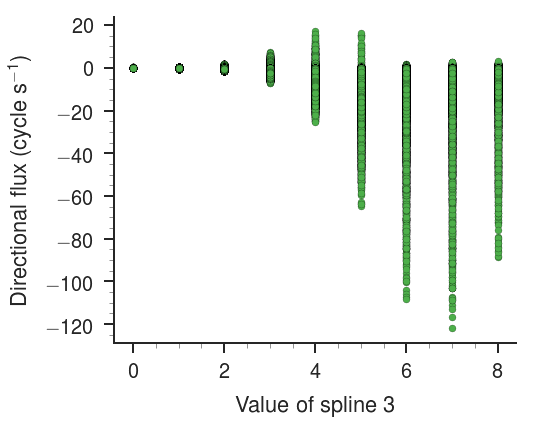

In [21]:
fig = plt.figure(figsize=(6 * 1.2, 6))
grid = GridSpec(1, 1, wspace=0.4, hspace=0.2)
ax2 = plt.subplot(grid[0, 0])
ax2.scatter(df['point 3'], df['flux'], color=c[2], lw=0.2, edgecolor='k')
ax2.set_xlabel('Value of spline 3')
ax2.set_ylabel('Directional flux (cycle s$^{-1}$)')
paper_plot(fig)

In [23]:
df[df['flux'] == df['flux'].min()]

,flux,point 1,point 2,point 3,point 4,point 5,point 6
340361,-121.742665,5,6,7,7,8,8


In [24]:
x = [0, 10, 20, 40, 50, 59]
y = [5, 6, 7,
     7, 8, 8]
x_extrapolated = np.arange(60)
energy = interpolate.spline(x, y, xnew=x_extrapolated)

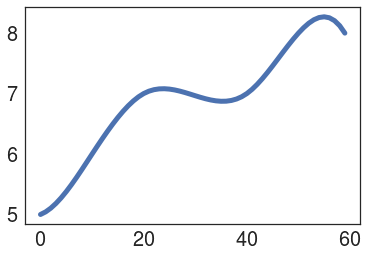

In [25]:
plt.plot(energy)